Visualization, Dictionaries and Selection
=====

Some of the code contained within this notebook is from Ch. 3 of *Data Science from Scratch* by J. Grus.



A fundamental data structure is a **dictionary** that allows you to store and access key-value pairs. 


In [21]:
# Initialize an empty dictionary
empty = {}
print empty

# Add/set a key/value pair
empty["boo"] = 'foo' 
print empty

# What happens if the key is not in the dictionary?
# print empty["fire"]
print empty.get("fire", "up chips?")

# Initialize a dictionary with a literal
not_empty = {'boo': 'foo', 'moe': 'doe'}
print not_empty

# You can grab lists of the keys, values or key-value pairs
print not_empty.keys(), not_empty.values(), not_empty.items()

{}
{'boo': 'foo'}
up chips?
{'moe': 'doe', 'boo': 'foo'}
['moe', 'boo'] ['doe', 'foo'] [('moe', 'doe'), ('boo', 'foo')]


It's possible to create a dictionary from a list in which the elements are the keys and the value are the counts.  This makes use of a **Counter** form the collections module.

In [22]:
from collections import Counter
c = Counter([0, 1, 2, 0])

print c 

Counter({0: 2, 1: 1, 2: 1})


Other data structures are **sets** and **tuples**.  Sets are a collection of distinct elements.  It is not possible to access these individually.  Set memberships can quickly be tested.

In [23]:
s = set()
s.add('a')
s.add('b')
s.add('c')

print len(s) # Number of elements in set

s.add('c') # What does this do?

print "Is 'c' in s:", 'c' in s
print "Is 'd' in s:", 'd' in s

letters = list("hi there") # str to list
chars = set(letters) # list to set
distinct_letters = list(chars) # set to list

print letters, chars, distinct_letters


3
Is 'c' in s: True
Is 'd' in s: False
['h', 'i', ' ', 't', 'h', 'e', 'r', 'e'] set([' ', 'e', 'i', 'h', 'r', 't']) [' ', 'e', 'i', 'h', 'r', 't']


**tuples** are similiar to list but are immutable.  

In [24]:
my_list = [1, 2]
my_tuple = (1, 2)

my_list.append(3)
#my_tuple.append(3) # No, no
#my_tuple[1] = 2    # No, no, no

print "my_list", my_list[0], my_list[1]
print "my_tuple", my_tuple[0], my_tuple[1]

for i, num in enumerate(my_tuple):
    print i, num

my_list 1 2
my_tuple 1 2
0 1
1 2


Selection is primarly accomplished with `if` or `if/else`.

In [25]:
num = 3

if num > 3:
    print "num is greater than 3"
elif num < 0:
    print "num is negative"
else:
    print "0, 1, 2 or 3"


0, 1, 2 or 3


We will make use of a library called matplotlib.  It works well for simple plots, bar graphs and line charts.  With jupyter, it is advisable to use `%matplotlib inline`.  This is an iPython magic command that places a plot in the notebook.  

With matplotlib.  Data is passed into a function to build up a particular type of plot.  It is then displayed with `show()`.


A simple line plot can be constructed through a set of parallel arrays.  Then use `plot` and pass in the independent and dependent varaibles, respectively.

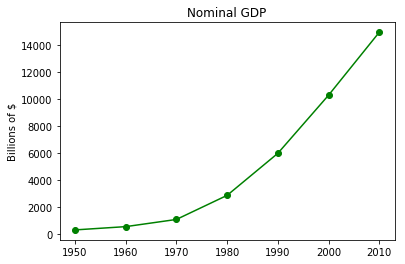

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

A bar chart works well to show counts of distinct items.  Parallel arrays are used to keep track of the item/category names and counts.  Additonally, we have to specify where each bar will be placed.  Labels can be placed using `xticks`.

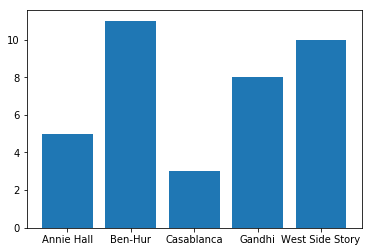

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar([i for i, _ in enumerate(movies)], num_oscars) # Provide a location for each bar
plt.xticks(range(len(movies)), movies) # Provide a location along with name for each movie

plt.show()

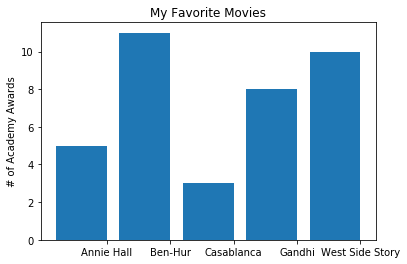

In [15]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    
plt.show()

A bar chart can be used to create a histogram but we need to bin the data first and then show the counts for each bin.  Round down each grade to 10, 20, 30, etc. and then count the number of each one.  What is being counted can be used as the location for the bin in the x axis.  

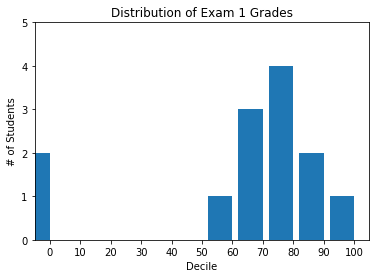

In [16]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]

#decile = lambda grade: grade // 10 * 10 
#histogram = Counter(decile(grade) for grade in grades)

decile_counts = [grade // 10 * 10 for grade in grades]
histogram = Counter(decile_counts)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
         histogram.values(),                # give each bar its correct height
         8)                                 # give each bar a width of 8
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

A simple scatter plot can be created with parallel arrays.  

Text(0,0.5,'test 2 grade')

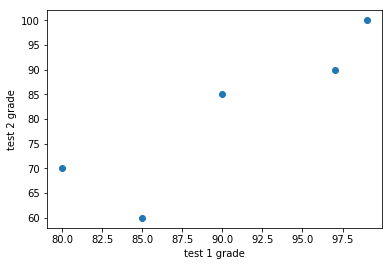

In [17]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")

Labels can be added to points individually using `annotate`.  

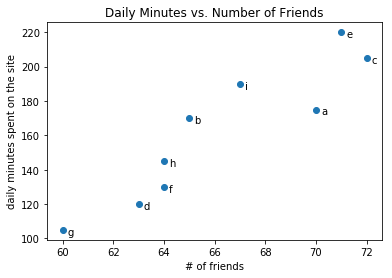

In [18]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
    
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):  # What does zip do???
    plt.annotate(label,
                 xy=(friend_count, minute_count), # put the label with its point
                 xytext=(5, -5), # but slightly offset
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

Pie charts are as simple as ...

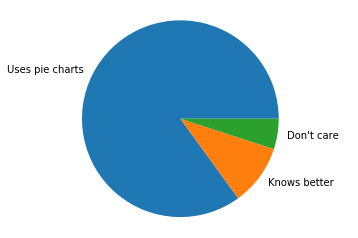

In [19]:
plt.pie([0.85, 0.1, 0.05], labels=["Uses pie charts", "Knows better", "Don't care"])

# make sure pie is a circle and not an oval
plt.axis("equal")
plt.show()